In [1]:
import os
path=os.getcwd() 
import sys
sys.path.append(path)
import libmix as lib

In [2]:
N = 120
divisors = [1,2,3,4,5,6,8,10,12,15,20,24,30,40,60]
graphByIslands = []
for i in divisors:
    islands = lib.islandGraph(N,i,1)
    graphByIslands.append(lib.islands2graph(islands))

120
60
40
30
24
20
15
12
10
8
6
5
4
3
2


In [3]:
epsilon = 0.25
simulationIslands = []
def processInput(g,M,eps):
    result = lib.monteCarlo(g,M,eps,approx=True) 
    #simulationBarabasi[sizes.index(s)]=result
    print(len(g),". mean=",np.mean(result[0]),", var=",np.var(result[0]), " median = ",np.median(result[0]))
    return result

In [4]:
lib.monteCarlo(graphByIslands[1],10,epsilon,1,1000,True) 

([2760.0,
  2903.0,
  2167.0,
  6149.0,
  1048.0,
  13457.0,
  630.0,
  321.0,
  9430.0,
  21912.0],
 [0.5670903567886658,
  0.5681476276346602,
  0.5683366053426246,
  0.567646250691244,
  0.5661477428571426,
  0.5670213333333332,
  0.5655872368953878,
  0.5663240714285712,
  0.5663490631229234,
  0.5656541758241757,
  0.5661962276990182,
  0.5653786978354975,
  0.5659563639097742,
  0.565847187633262,
  0.5655174433862431,
  0.5652544235294117,
  0.5643329618352448,
  0.5642380103519666,
  0.5631930857142856,
  0.5628301428571427,
  0.5624256620060789,
  0.5620048853118711,
  0.562116724075924,
  0.5623184857142857,
  0.5619399320197043,
  0.5620651847358119,
  0.561802688435374,
  0.5613700718146717,
  0.559234211121764,
  0.5592925523809523,
  0.5598311837275306,
  0.5588722902255637,
  0.5592166093370681,
  0.5589867662337662,
  0.5578013105990782,
  0.5568468227106227,
  0.5562753064604185,
  0.5561094354430377,
  0.5559223484276729,
  0.5557375999999998,
  0.5553413788819875,
  

In [8]:
from joblib import Parallel, delayed
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
num_cores = multiprocessing.cpu_count()
print num_cores

6


In [25]:
simulationIslands = Parallel(n_jobs=num_cores)(delayed(processInput)(g,1000,epsilon) for g in graphByIslands)

(120, '. mean=', 293.65100000000001, ', var=', 1868.2591990000001, ' median = ', 301.0)
(120, '. mean=', 1799.9159999999999, ', var=', 935914.24094399984, ' median = ', 1582.5)
(120, '. mean=', 1205.473, ', var=', 299290.28727100004, ' median = ', 1109.5)
(120, '. mean=', 2404.9470000000001, ', var=', 2666139.0621910002, ' median = ', 1963.0)
(120, '. mean=', 865.67399999999998, ', var=', 87215.781724, ' median = ', 827.0)
(120, '. mean=', 3309.4050000000002, ', var=', 6411855.5549749993, ' median = ', 2672.5)
(120, '. mean=', 710.23800000000006, ', var=', 45500.793356000002, ' median = ', 679.0)
(120, '. mean=', 536.03399999999999, ', var=', 16345.474844, ' median = ', 518.5)
(120, '. mean=', 428.84699999999998, ', var=', 6987.6535910000002, ' median = ', 422.0)
(120, '. mean=', 398.346, ', var=', 5047.1542840000002, ' median = ', 393.0)
(120, '. mean=', 370.29700000000003, ', var=', 3781.1067910000002, ' median = ', 363.0)
(120, '. mean=', 366.01799999999997, ', var=', 6757.345675999

In [47]:
averages = [lib.averageTVeps(simulationIslands[i][1][0:1000],epsilon,N) for i in range(len(divisors))]
colors=['blue','red','green','yellow','black','pink','purple','brown','cyan','magenta','#fb0d00','#00bbef','#e96b39','#DBB0EF','#ACE1AF']
xaxis = [N+i for i in range(1000)]
plt.figure(figsize=(10,8))
plt.plot(legend=True)
plt.xlabel('t')
plt.ylabel('TV distance')
plt.plot(xaxis,simulationIslands[0][1][0:1000],c='blue',label='k=1')
plt.plot(xaxis,simulationIslands[1][1][0:1000],c='red',label='k=2')
plt.plot(xaxis,simulationIslands[2][1][0:1000],c='green',label='k=3')
plt.plot(xaxis,simulationIslands[3][1][0:1000],c='yellow',label='k=4')
plt.plot(xaxis,simulationIslands[4][1][0:1000],c='black',label='k=5')
plt.plot(xaxis,simulationIslands[5][1][0:1000],c='pink',label='k=6')
plt.plot(xaxis,simulationIslands[6][1][0:1000],c='purple',label='k=8')
plt.plot(xaxis,simulationIslands[7][1][0:1000],c='brown',label='k=10')
plt.plot(xaxis[0:1000],simulationIslands[8][1][0:1000],c='cyan',label='k=12')
plt.plot(xaxis[0:1000],simulationIslands[9][1][0:1000],c='magenta',label='k=15')
plt.plot(xaxis[0:1000],simulationIslands[10][1][0:1000],c='#fb0d00',label='k=20')
plt.plot(xaxis[0:1000],simulationIslands[11][1][0:1000],c='#00bbef',label='k=24')
plt.plot(xaxis,simulationIslands[12][1][0:1000],c='#e96b39',label='k=30')
plt.plot(xaxis[0:1000],simulationIslands[13][1][0:1000],c='#DBB0EF',label='k=40')
plt.plot(xaxis[0:1000],simulationIslands[14][1][0:1000],c='#ACE1AF',label='k=60')
#epsilon
plt.axhline(y=.25, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'red',linestyle='--')
#mixingTimes
for i in range(len(averages)):
    plt.axvline(x=averages[i], ymin=0.0, ymax = 0.217, linewidth=1, color=colors[i],linestyle='--')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('islandsdependency.png')

In [48]:
t120 = [ simulationIslands[i][1][0] for i in range(len(divisors))]
t400 = [ simulationIslands[i][1][280] for i in range(len(divisors))]
t600 = [ simulationIslands[i][1][480] for i in range(len(divisors))]
t800 = [ simulationIslands[i][1][680] for i in range(len(divisors))]
t1000 = [ simulationIslands[i][1][880] for i in range(len(divisors))]
fig=plt.figure(figsize=(10,8))
ax = fig.gca()
plt.xlabel('k')
plt.ylabel('TV distance')
plt.plot(divisors,t120,c='purple',label='t=120',linestyle='-',marker='o')
plt.plot(divisors,t400,c='red',label='t=400',marker='o')
plt.plot(divisors,t600,c='black',label='t=600',marker='o')
plt.plot(divisors,t700,c='orange',label='t=800',marker='o')
plt.plot(divisors,t1000,c='green',label='t=1000',marker='o')
ax.set_xticks(divisors)
plt.grid()
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('islandscomparison.png')

In [49]:
import math
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)
from scipy import linspace, polyval, polyfit, sqrt, stats, randn
(ar,br)=polyfit(divisors,inversion,1)
xr = polyval([ar,br],divisors)

averageMT=[mean(simulationIslands[i][0]) for i in range(15) ]
avs = [float(averages[i]) for i in range(len(averages))]
averageMT
diff = [averageMT[i]-averages[i] for i in range(len(avs))]
diff
male = [0,7,8,9,10,11]
inversion = [float(divisors[i])/math.log(averageMT[i]) for i in range(len(avs))]
fig=plt.figure(figsize=(10,8))
plt.plot(divisors,inversion,marker='o')
plt.plot(divisors,xr,color='red',linestyle='--')
plt.xlabel('k')
plt.ylabel('k/log(t_mix(k))')
plt.grid()
#plt.show()
plt.savefig('islandsinversion.png')

In [29]:
[ar,br]

[0.17156728316096054, -0.158325201729033]

In [52]:
IslMedian = [ np.median(simulationIslands[i][0]) for i in range(len(divisors)) ]
fig=plt.figure(figsize=(10,6))
ax = fig.gca()
plt.xlabel('k')
plt.ylabel('t')
plt.plot(divisors,averageMT,c='purple',label='Average Mixing Time',linestyle='-',marker='o')
plt.plot(divisors,IslMedian,c='brown',label='Median',linestyle='-',marker='o')
ax.set_xticks(divisors)
plt.grid()
plt.legend(bbox_to_anchor=(0.69, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('islandsMT.png')

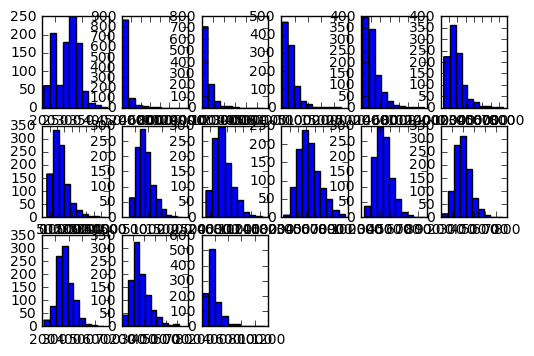

In [54]:
h=[]
i=1
fig = plt.figure()
for g in simulationIslands:
    h.append( fig.add_subplot(3,6,i))
    h[i-1].hist(g[0])
    i=i+1
plt.show()

In [82]:
IslVar = [math.log(np.var(simulationIslands[i][0])/1000.0) for i in range(len(divisors))]
IslMax = [math.log(max(simulationIslands[i][0])) for i in range(len(divisors))]
fig=plt.figure(figsize=(10,6))
ax = fig.gca()
plt.xlabel('k')
plt.plot(divisors,IslMax,c='purple',label='Log(Max(Tau))',linestyle='-',marker='o')
plt.plot(divisors,IslVar,c='blue',label='Log(Var(Tau)/1000)',linestyle='-',marker='o')
ax.set_xticks(divisors)
plt.grid()
plt.legend(bbox_to_anchor=(0.69, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('islandsVar.png')


In [ ]:
#grafy cykliczne

In [ ]:
cg =[]
for i in range(35):
    cg.append(lib.circleGraph(i+4))

In [ ]:
epsilon = 0.25
simulationCircle = []
for g in cg:
    simulationCircle.append( lib.monteCarlo(g,2500,epsilon,resolution=1)  )
    print "."

In [ ]:
datafile=open('dane2','w')
for i in range(len(simulationCircle[0][0])):
    for j in range(35):
        datafile.write(str(simulationCircle[j][0][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
datafile=open('dane3','w')
for i in range(len(simulationCircle[0][1])):
    for j in range(35):
        datafile.write(str(simulationCircle[j][1][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
#powinno byc od 5:1005
Caverages = [averageTVeps(simulationCircle[i][1][0:1000],epsilon,0) for i in range(35)]
Ccolors = ['blue','red','green','yellow','magenta','brown']
Cmeans = [mean(simulationCircle[i][0]) for i in range(35)]
xaxis = [i for i in range(1100)]
plt.figure(figsize=(10,8))
plt.plot(legend=True)
plt.plot(xaxis[4:1004],simulationCircle[0][1],c='blue',label='N=4')
plt.plot(xaxis[9:1009],simulationCircle[5][1],c='red',label='N=9')
plt.plot(xaxis[14:1014],simulationCircle[10][1],c='green',label='N=14')
plt.plot(xaxis[19:1019],simulationCircle[15][1],c='yellow',label='N=19')
plt.plot(xaxis[24:1024],simulationCircle[20][1],c='magenta',label='N=24')
plt.plot(xaxis[29:1029],simulationCircle[25][1],c='brown',label='N=29')
plt.xlabel('t')
plt.ylabel('TV distance')
#epsilon
plt.axhline(y=.25, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'red',linestyle='--')
#mixingTimes
for i in [0,5,10,15,20,25]:
    plt.axvline(x=Caverages[i]+4+i, ymin=0.0, ymax = 0.32, linewidth=1, color=Ccolors[i/5],linestyle='--')
    plt.axvline(x=Cmeans[i], ymin=0.0, ymax = 0.32, linewidth=1, color=Ccolors[i/5],linestyle=':')
plt.legend(bbox_to_anchor=(0.865, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(0.865, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('circleTVdist.png')

In [ ]:
#powinno być  5:75
xaxis = [i for i in range(1100)]
plt.figure(figsize=(10,8))
plt.plot(legend=True)
plt.plot(xaxis[4:74],simulationCircle[0][1][0:70],c='blue',label='N=4')
plt.plot(xaxis[9:79],simulationCircle[5][1][0:70],c='red',label='N=9')
plt.plot(xaxis[14:84],simulationCircle[10][1][0:70],c='green',label='N=14')
plt.plot(xaxis[19:89],simulationCircle[15][1][0:70],c='yellow',label='N=19')
plt.xlabel('t')
plt.ylabel('TV distance')
for i in range(15):
    plt.axvline(x=i*4+4, ymin=0.0, ymax = 0.4*math.exp(-float(i)/10.0), linewidth=0.5,linestyle='--')
plt.legend(bbox_to_anchor=(0.865, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('circleanomalyTVdist.png')

In [ ]:
cMedians = [np.median(simulationCircle[i][0]) for i in range(35)]

fig=plt.figure(figsize=(10,6))
ax = fig.gca()
plt.xlabel('N')
plt.ylabel('t')
plt.plot([i+4 for i in range(35)],Cmeans,color='purple',label='Average Mixing Time',linestyle='-',marker='o')
plt.plot([i+4 for i in range(33)],Caverages[0:33],color='green',label='Tau^',linestyle='-',marker='o')
#plt.plot([i+4 for i in range(33)],[math.exp(0.189*(i+4)) for i in range(33) ],color='red',label='',linestyle='--')
#plt.plot([i+4 for i in range(33)],[0.75*(i+4)**2 for i in range(33) ],color='red',label='',linestyle='--')
#plt.plot([i+4 for i in range(35)],[0.55*(i+4)**2 for i in range(35) ],color='red',label='',linestyle='--')
plt.plot([i+4 for i in range(35)],xcr,color='red',label='t=0.79N^2-2.72N+4.9',linestyle='--')
plt.plot([i+4 for i in range(33)],ycr,color='yellow',label='t=0.8N^2-3.05N-1.02',linestyle='--')
plt.plot([i+4 for i in range(35)],cMedians,color='brown',label='Mediana',linestyle='-',marker='o')
plt.legend(bbox_to_anchor=(0.0, 1), loc=2, borderaxespad=0.)
plt.grid()
#plt.show()
plt.savefig('circleMT.png')

In [ ]:
(acr,bcr,ccr)=polyfit([i+4 for i in range(35)],Cmeans,2)
xcr = polyval([acr,bcr,ccr],[i+4 for i in range(35)])

(ac2r,bc2r,cc2r)=polyfit([i+4 for i in range(33)],Caverages[0:33],2)
ycr = polyval([ac2r,bc2r,cc2r],[i+4 for i in range(33)])

[acr,bcr,ccr,ac2r,bc2r,cc2r]

In [ ]:
#estymacja wariancji
Cvar = [ np.var(simulationCircle[i][0]) for i in range(35) ]
plt.plot([i+4 for i in range(35)],Cvar,color='red',label='Variance',linestyle='-')
plt.show()

In [ ]:
#grafy pełne
fg =[]
for i in [50*(i+1) for i in range(10)]:
    fg.append(lib.fullGraph(i+4))
    epsilon = 0.25
simulationFull = []
for g in fg:
    simulationFull.append( lib.monteCarlo(g,2500,epsilon,resolution=1)  )
    print "."

In [ ]:
datafile=open('daneFullMT','w')
for i in range(len(simulationFull[0][0])):
    for j in range(10):
        datafile.write(str(simulationFull[j][0][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
xaxis = [i for i in range(1500)]
plt.figure(figsize=(10,8))
plt.plot(legend=True)
plt.plot(xaxis[50:1050],simulationFull[0][1],c='red',label='N=50')
plt.plot(xaxis[100:1100],simulationFull[1][1],c='blue',label='N=100')
plt.plot(xaxis[150:1150],simulationFull[2][1],c='green',label='N=150')
plt.plot(xaxis[200:1200],simulationFull[3][1],c='magenta',label='N=200')
plt.plot(xaxis[250:1250],simulationFull[4][1],c='pink',label='N=250')
plt.plot(xaxis[300:1300],simulationFull[5][1],c='purple',label='N=300')
plt.plot(xaxis[350:1350],simulationFull[6][1],c='black',label='N=350')
plt.plot(xaxis[400:1400],simulationFull[7][1],c='brown',label='N=400')
plt.plot(xaxis[450:1450],simulationFull[8][1],c='orange',label='N=450')
plt.plot(xaxis[500:1500],simulationFull[9][1],c='yellow',label='N=500')
plt.axhline(y=.25, xmin=0.0, xmax=1.0, linewidth=0.5, color = 'red',linestyle='--')
plt.xlabel('t')
plt.ylabel('TV distance')
#for i in range(15):
#    plt.axvline(x=i*4+4, ymin=0.0, ymax = 0.4*math.exp(-float(i)/10.0), linewidth=0.5,linestyle='--')
plt.legend(bbox_to_anchor=(0.848, 1), loc=2, borderaxespad=0.)
#plt.show()
plt.savefig('fullTVdist.png')

In [ ]:
epsVec = [0.5-0.01*float(e) for e in range(42) ]
size = 150
fgEps = fullGraph(100)
simulationFullEps = []
for eps in epsVec:
    simulationFullEps.append( monteCarlo(fgEps,3000,eps,resolution=1)  )
    print "."

In [ ]:
datafile=open('daneFullEps','w')
for i in range(len(simulationFullEps[0][0])):
    for j in range(42):
        datafile.write(str(simulationFullEps[j][0][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
xaxis = [50*(i+1) for i in range(10)]
fullMeans = [mean(simulationFull[i][0]) for i in range(10)]
fullMedians = [np.median(simulationFull[i][0]) for i in range(10)]
plt.figure(figsize=(10,8))
plt.plot(legend=True)
plt.plot(xaxis,fullMeans,c='red',label='Average Mixing Time',marker='o')
plt.plot(xaxis,fullMedians,c='blue',label='Median',marker='o')
plt.xlabel('N')
plt.ylabel('t')
#for i in range(15):
#    plt.axvline(x=i*4+4, ymin=0.0, ymax = 0.4*math.exp(-float(i)/10.0), linewidth=0.5,linestyle='--')
plt.legend(bbox_to_anchor=(0.848, 1), loc=2, borderaxespad=0.)
plt.grid()
#plt.show()
plt.savefig('fullMT.png')

In [ ]:
(arFMea,brFMea)=polyfit(xaxis,fullMeans,1)
xrMea = polyval([arFMea,brFMea],xaxis)
[arFMea,brFMea]

In [ ]:
(arFMed,brFMed)=polyfit(xaxis,fullMedians,1)
xrMed = polyval([arFMed,brFMed],xaxis)
[arFMed,brFMed]

In [ ]:
epsVec2 = [0.35-0.001*float(e) for e in range(150) ]
size = 100
fgEps2 = fullGraph(size)
simulationFullEps2 = []
for eps in epsVec2:
    simulationFullEps2.append( monteCarlo(fgEps2,5000,eps,resolution=1)  )
    print eps

In [ ]:
datafile=open('daneFullEps2','w')
for i in range(len(simulationFullEps2[0][0])):
    for j in range(150):
        datafile.write(str(simulationFullEps2[j][0][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
#sieci bezskalowe
sizeN=120
M=1000
ps = [0.1,0.5,1,1.5]
eds = [[0]*sizeN for i in range(len(ps))]
for i in range(M):#monte carlo
    for p in ps:#potegi
        g = lib.barabasiGraph(sizeN,nomPower=p)
        edpom = lib.edgeDistribution(g)
        for j in range(sizeN):
            eds[ps.index(p)][j]=eds[ps.index(p)][j]+edpom[j]
for i in range(sizeN):
    for j in range(len(ps)):
        eds[j][i]=1.0*eds[j][i]/(sizeN*M)

In [ ]:
xaxis = [i+1 for i in range(9)]
plt.plot(xaxis,eds[0][1:10],'r--',marker='.',color='green',label='p=0.1')
plt.plot(xaxis,eds[1][1:10],'r--',marker='.',color='orange',label='p=0.5')
plt.plot(xaxis,eds[2][1:10],'r--',marker='.',color='blue',label='p=1.0')
plt.plot(xaxis,eds[3][1:10],'r--',marker='.',color='red',label='p=1.5')
plt.legend(bbox_to_anchor=(0.764, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

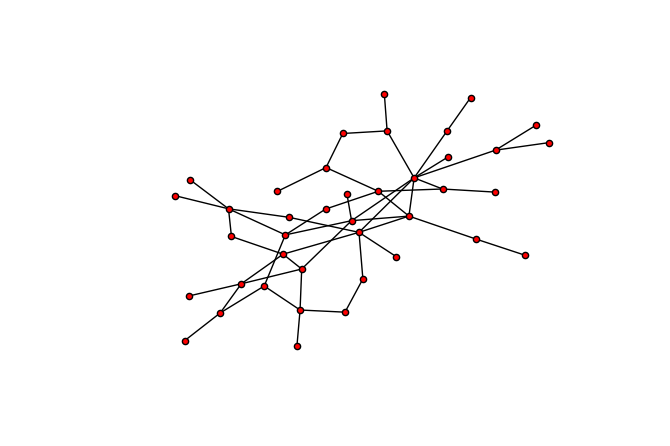

In [2]:
#testowanie
bg=lib.barabasiGraph(40,nomPower=0.1,denomPower=1.0)
lib.graph2nx(bg)

In [ ]:
#obliczenia równoległe
def processInput(s,M,eps,nom=1.0,denom=1.0):
    result = lib.monteCarloB(s,M,eps,nom=nom,denom=denom) 
    print(". mean=",np.mean(result[0]),", var=",np.var(result[0]), " median = ",np.median(result[0]))
    return result

In [ ]:
maxRange=34
monteCarloSamples = 2000
epsilon=0.25
sizes = [10*n+20 for n in range(maxRange)]
simulationBarabasi=[0]*len(sizes)

In [ ]:
from joblib import Parallel, delayed
import multiprocessing

num_cores = multiprocessing.cpu_count()
print num_cores

In [ ]:
#tutaj zapisujemy wyniki dla grafów barabasi-alberta; obliczenia wykonywane są równolegle
results = Parallel(n_jobs=num_cores)(delayed(processInput)(s,monteCarloSamples,epsilon) for s in sizes)


In [ ]:
datafile=open('daneBarabasiMT','w')
for i in range(len(results[0][0])):
    for j in range(maxRange):
        datafile.write(str(results[j][0][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
datafile=open('daneBarabasiTVd','w')
for i in range(len(results[0][1])):
    for j in range(maxRange):
        datafile.write(str(results[j][1][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
lines = [line.rstrip('\n') for line in open('daneBarabasiMT')]
columns = [[float(s) for s in lines[i].split('\t')[0:(len(lines[i].split('\t'))-1)]] for i in range(len(lines))]
RfF=[ [ columns[i][j] for i in range(monteCarloSamples)] for j in range(len(columns[0])) ]

In [ ]:
means = [ np.mean(RfF[i]) for i in range(maxRange)]
medians = [ np.median(RfF[i]) for i in range(maxRange)]
var = [ np.var(RfF[i]) for i in range(maxRange)]
colors=['blue','red','green','yellow','black','pink','purple','brown','cyan','magenta','#fb0d00','#00bbef']
numberOfSizes = len(sizes)

In [ ]:
fig=plt.figure(figsize=(10,6))
ax = fig.gca()
plt.xlabel('N')
plt.ylabel('t')
plt.plot(legend=True)
plt.plot(sizes,means,color=colors[0],label='Average Mixing Time',linestyle=' ',marker='+')
plt.plot(sizes,medians,color=colors[6],label='Median',linestyle=' ',marker='x')
ranges = np.arange(20,350,10)
plt.plot(ranges,2.607*ranges-8.421,'r--',label='Complete graph')
plt.legend(bbox_to_anchor=(0.0, 1), loc=2, borderaxespad=0.)
plt.grid()
#plt.show()
plt.savefig('barabasiMT1.png')

In [ ]:
fig=plt.figure(figsize=(10,6))
ax = fig.gca()
plt.xlabel('t')
plt.ylabel('TV distance')
ranges = np.arange(0,1500,1)
plt.plot(legend=True)
plt.plot(ranges[20:400],results[0][1][0:380],color=colors[0],label='N=20',linestyle='-')
plt.plot(ranges[100:400],results[5][1][0:300],color=colors[1],label='N=100',linestyle='-')
plt.plot(ranges[200:400],results[10][1][0:200],color=colors[2],label='N=200',linestyle='-')
plt.legend(bbox_to_anchor=(0.0, 1), loc=2, borderaxespad=0.)
plt.grid()
#plt.show()
plt.savefig('barabasiTVd1.png')

In [ ]:
hugeSizes = [3000,3000,3000,3000,3000,3000]
hugeResults = Parallel(n_jobs=num_cores)(delayed(processInput)(s,10,0.25) for s in hugeSizes)

In [ ]:
datafile=open('hugeTVd','w')
for i in range(len(hugeResults[0][1])):
    for j in range(6):
        datafile.write(str(hugeResults[j][1][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
datafile=open('hugeMT','w')
for i in range(len(hugeResults[0][0])):
    for j in range(6):
        datafile.write(str(hugeResults[j][0][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
hr=[]
for i in range(6):
    hr = hr+hugeResults[i][0]
print "mean=",np.mean(hr)," median=",np.median(hr)," min=",np.min(hr)," expected=",3000*4.438-25.81
print sum()

In [ ]:
powers = list(np.arange(0.3,1.05,0.05))
powers2 = list(np.arange(0.5,2.05,0.05))
resultsPowers1 = Parallel(n_jobs=num_cores)(delayed(processInput)(80,2000,eps=0.25,nom=nom) for nom in powers)

In [ ]:
datafile=open('danePowerMT','w')
for i in range(len(resultsPowers1[0][0])):
    for j in range(len(powers)):
        datafile.write(str(results[j][0][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
datafile=open('danePowerTVd','w')
for i in range(len(resultsPowers1[0][1])):
    for j in range(len(powers)):
        datafile.write(str(results[j][1][i]))
        datafile.write('\t')
    datafile.write('\n')
datafile.close()

In [ ]:
meansP1 = [ np.mean(resultsPowers1[j][0]) for j in range(len(powers)-1)]
mediansP1 = [ np.median(resultsPowers1[j][0]) for j in range(len(powers)-1)]
varP1 = [ np.var(resultsPowers1[j][0]) for j in range(len(powers)-1)]
meansP1.append(means[6])
mediansP1.append(medians[6])

In [ ]:
fig=plt.figure(figsize=(10,6))
ax = fig.gca()
plt.xlabel('Power')
plt.ylabel('t')

plt.plot(legend=True)
plt.plot(powers,meansP1,color=colors[0],label='Average Mixing Time',linestyle=' ',marker='o')
plt.plot(powers,mediansP1,color=colors[6],label='Median',linestyle=' ',marker='o')


plt.legend(bbox_to_anchor=(0.68, 1), loc=2, borderaxespad=0.)
plt.grid()
#plt.show()
plt.savefig('powerMT1.png')

In [ ]:
fig=plt.figure(figsize=(6,6))
ax = fig.gca()
plt.xlabel('t')
plt.ylabel('TV distance')

plt.plot(legend=True)
plt.plot(ranges[80:580],resultsPowers1[0][1][0:500],color=colors[0],label='p=0.3',linestyle='-')
plt.plot(ranges[80:580],resultsPowers1[4][1][0:500],color=colors[1],label='p=0.5',linestyle='-')
plt.plot(ranges[80:580],resultsPowers1[8][1][0:500],color=colors[2],label='p=0.7',linestyle='-')
plt.plot(ranges[80:580],resultsPowers1[12][1][0:500],color=colors[8],label='p=0.9',linestyle='-')
plt.legend(bbox_to_anchor=(0.763, 1), loc=2, borderaxespad=0.)
plt.grid()
plt.show()

In [ ]:
(ar,br)=polyfit(sizes,means,1)
xr = polyval([ar,br],sizes)
[ar,br]